In [20]:
import numpy as np
import pandas as pd
import pickle
import project_tools as tools
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Some magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Read all Data into Notebook
original_stats = tools.get_weekly_stats()
original_games = tools.get_data('games', 2004)
original_records = tools.get_data('records', 2004)
original_teams = pd.read_json('https://api.collegefootballdata.com/teams')

In [22]:
# Reset indecis of all dataframes
original_stats = original_stats.reset_index(drop=True)
original_games = original_games.reset_index(drop=True)
original_records = original_records.reset_index(drop=True)
original_teams = original_teams.reset_index(drop=True)

In [24]:
# Save all Data into Pickle File
with open('cfb_data.pkl','wb') as f:
    pickle.dump([original_stats, original_games, original_records, original_teams], f )

In [2]:
# Load all Data into Pickle File
with open('cfb_data.pkl', 'rb') as f:
    original_stats, original_games, original_records, original_teams = pickle.load(f)

In [2]:
games = tools.get_games_df('train')

['firstDowns', 'fourthDownConversions', 'fourthDowns', 'fumblesLost', 'fumblesRecovered', 'interceptionTDs', 'interceptionYards', 'interceptions', 'netPassingYards', 'passAttempts', 'passCompletions', 'passesIntercepted', 'passingTDs', 'penalties', 'penaltyYards', 'possessionTime', 'puntReturnTDs', 'puntReturnYards', 'puntReturns', 'rushingAttempts', 'rushingTDs', 'rushingYards', 'thirdDownConversions', 'thirdDowns', 'totalYards', 'turnovers']


In [168]:
games

,season,week,home_team,away_team,result,home_games,away_games,firstDowns_spread,fourthDownConversions_spread,fourthDowns_spread,fumblesLost_spread,fumblesRecovered_spread,interceptionTDs_spread,interceptionYards_spread,interceptions_spread,netPassingYards_spread,passAttempts_spread,passCompletions_spread,passesIntercepted_spread,passingTDs_spread,penalties_spread,penaltyYards_spread,possessionTime_spread,puntReturnTDs_spread,puntReturnYards_spread,puntReturns_spread,rushingAttempts_spread,rushingTDs_spread,rushingYards_spread,thirdDownConversions_spread,thirdDowns_spread,totalYards_spread,turnovers_spread,home_for,home_against,away_for,away_against
0,2004,1,Virginia Tech,USC,-11.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2004,2,Eastern Michigan,Buffalo,3.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2004,2,Utah,Texas A&M,20.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2004,2,Ball State,Boston College,-8.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2004,2,TCU,Northwestern,3.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10453,2018,14,Georgia,Alabama,-7.0,12.0,12.0,0.750000,0.166667,-0.083333,0.000000,0.250000,-0.250000,-8.250000,0.083333,-62.833333,-1.916667,-1.166667,-0.583333,-0.583333,0.416667,1.083333,193.916667,0.083333,6.000000,0.333333,4.250000,0.083333,65.500000,0.166667,0.750000,2.666667,0.083333,40.083333,17.166667,49.000000,13.750000
10454,2018,14,Boise State,Fresno State,-3.0,12.0,12.0,1.333333,0.500000,0.916667,-0.083333,0.666667,-0.166667,-20.750000,0.333333,-3.750000,1.916667,0.500000,-1.000000,0.083333,0.083333,5.500000,-53.083333,0.000000,4.583333,0.666667,-0.583333,-0.500000,1.666667,1.416667,1.166667,-2.083333,0.250000,37.000000,22.333333,36.250000,13.500000
10455,2018,14,Ohio State,Northwestern,21.0,12.0,12.0,8.083333,0.000000,-0.750000,0.500000,0.083333,0.083333,2.833333,-0.500000,118.833333,2.250000,5.333333,0.000000,2.333333,5.250000,48.083333,17.083333,0.166667,7.666667,0.166667,2.833333,0.000000,71.833333,0.166667,-2.000000,190.666667,0.000000,43.333333,25.833333,23.666667,21.666667
10456,2018,14,Pittsburgh,Clemson,-32.0,12.0,12.0,-3.083333,0.000000,0.333333,0.000000,0.083333,-0.083333,-5.000000,-0.250000,-105.833333,-8.750000,-6.583333,0.000000,-1.083333,3.166667,33.833333,545.583333,0.000000,-6.916667,-1.416667,4.166667,-1.000000,-1.416667,0.083333,1.500000,-107.250000,-0.250000,28.000000,27.750000,45.666667,14.000000


## Single Variable Linear Regression

In [15]:
pd.options.display.max_columns = None
train = games[games['season'] < 2018]
valid = games[games['season'] == 2018]

X_train = train['totalYards_spread'].to_numpy()
y_train = train['result'].to_numpy()

X_valid = valid['totalYards_spread'].to_numpy()
y_valid = valid['result'].to_numpy()

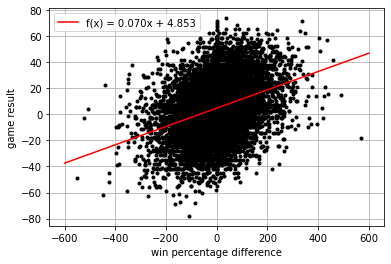

In [16]:
baseline_model = LinearRegression().fit(X_train.reshape(-1, 1), y_train)

x = np.linspace(-600, 600, 500)
y = baseline_model.coef_[0] * x + baseline_model.intercept_

plt.xlabel('win percentage difference')
plt.ylabel('game result')
plt.plot(train_x, train_y, '.', color='black')
plt.plot(x, y, '-r', label="f(x) = %.3fx + %.3f" % (baseline_model.coef_[0], baseline_model.intercept_))
plt.legend()
plt.grid()

In [17]:
prediction_train = baseline_model.predict(X_train.reshape(-1, 1))
prediction_valid = baseline_model.predict(X_valid.reshape(-1, 1))
print('RMSE on train = %.2f points' % mean_squared_error(y_train, prediction_train, squared=False))
print('RMSE on valid = %.2f points' % mean_squared_error(y_valid, prediction_valid, squared=False))

RMSE on train = 19.91 points
RMSE on valid = 21.11 points


## Ridge Regression Baseline

In [21]:
X= games.drop(['season','home_team','away_team','result'], axis=1).to_numpy()
y = games['result']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=0)

In [22]:
LinRegMod = Ridge(alpha=1.0)
LinRegMod.fit(X_train, y_train)

Ridge()

In [23]:
pred_train = LinRegMod.predict(X_train)
print('RMSE on train = %.2f points' % mean_squared_error(y_train, pred_train, squared=False))

print(f'Percent Correct (W/L) = {np.sum(np.sign(pred_train)==np.sign(y_train))/len(y_train)*100:.4}%')

RMSE on train = 18.31 points
Percent Correct (W/L) = 70.05%


In [35]:
alphas = np.linspace(0, 1, 1000)
train_loss = []
valid_loss = []
for alpha in alphas:
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
    LinRegMod = Ridge(alpha=alpha)
    LinRegMod.fit(X_train, y_train)
    pred_valid = LinRegMod.predict(X_valid)
    pred_train = LinRegMod.predict(X_train)
    train_loss.append(mean_squared_error(y_train, pred_train, squared=False))
    valid_loss.append(mean_squared_error(y_valid, pred_valid, squared=False))

/Users/jhrag/opt/anaconda3/envs/ee511/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.63467e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


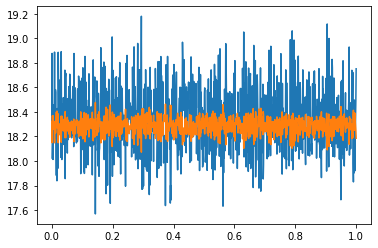

In [36]:
plt.plot(alphas,valid_loss)
plt.plot(alphas,train_loss)